<a href="https://colab.research.google.com/github/kimsm0566/Sciket_learn/blob/main/%EC%84%A0%ED%98%95_%EB%AA%A8%EB%8D%B8(Linear_Models).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])


<ipython-input-62-74e69c5ee709>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['seaborn-whitegrid'])


In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

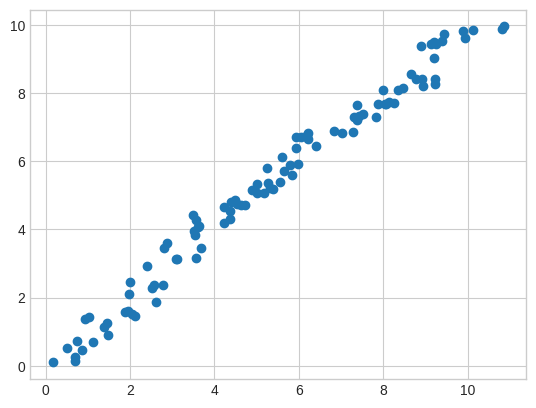

In [64]:
noise = np.random.rand(100,1)
X = sorted(10 * np.random.rand(100,1)) + noise
y = sorted(10 * np.random.rand(100))

plt.scatter(X,y);


In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [66]:
print("선형 회귀 가중치: {}".format(model.coef_))
print("선형 회귀 편향: {}".format(model.intercept_))

선형 회귀 가중치: [0.9754133]
선형 회귀 편향: 0.0886739127842775


In [67]:
print("학습데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가데이터 점수: {}".format(model.score(X_test, y_test)))

학습데이터 점수: 0.9792003991074659
평가데이터 점수: 0.9743335708977483


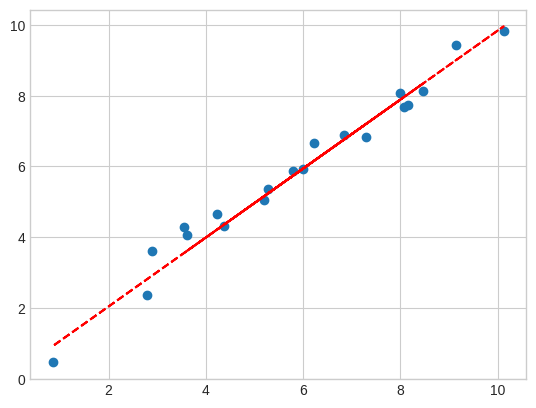

In [68]:
predict = model.predict(X_test)

plt.scatter(X_test, y_test)
plt.plot(X_test, predict, '--r');

In [69]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
print(housing.data.shape)
print(housing.target.shape)
print(housing.feature_names)

(20640, 8)
(20640,)
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [70]:
import pandas as pd

housing_df = pd.DataFrame(housing.data, columns = housing.feature_names)
housing_df['MEDV'] = housing.target
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MEDV
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [71]:
housing_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MEDV
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


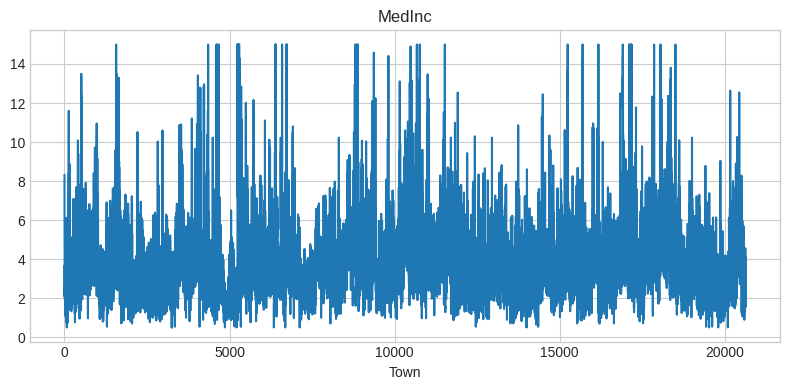

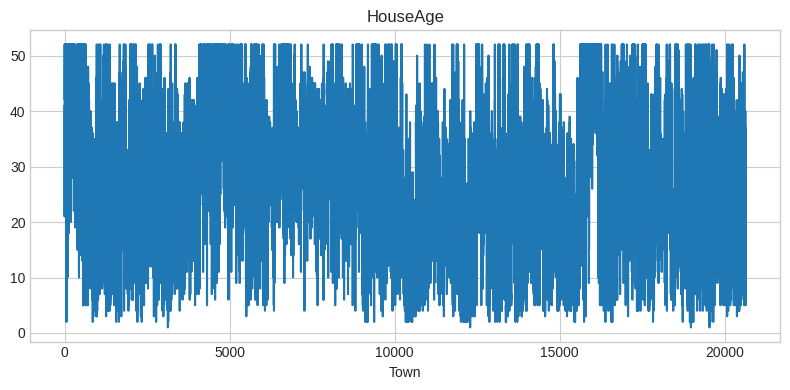

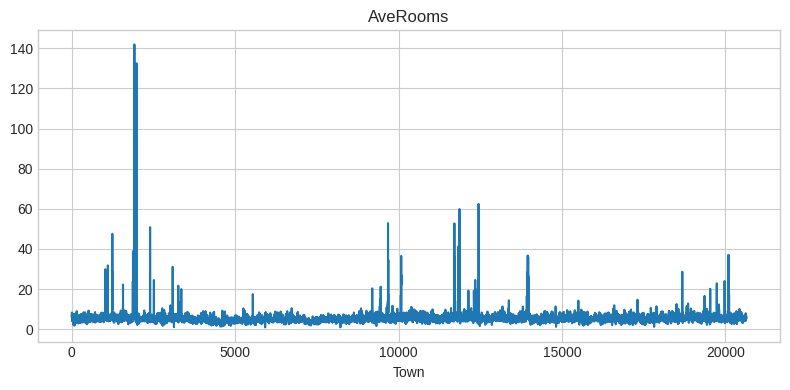

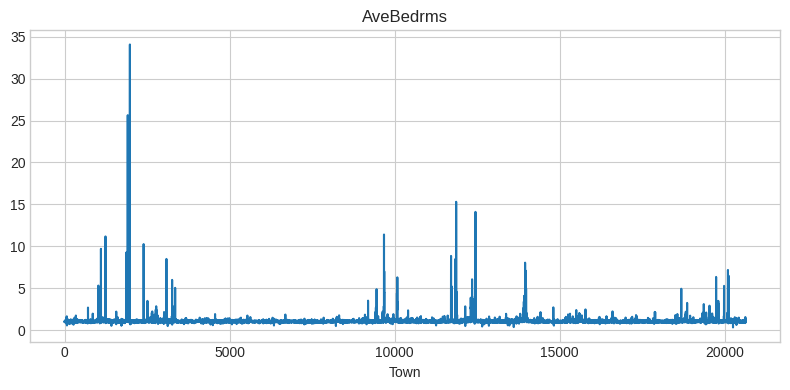

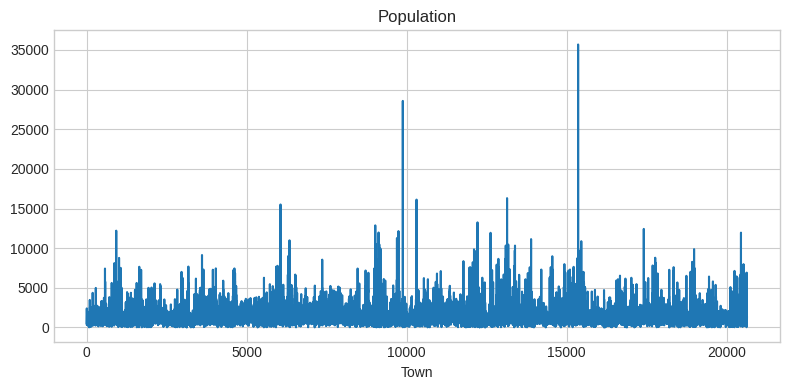

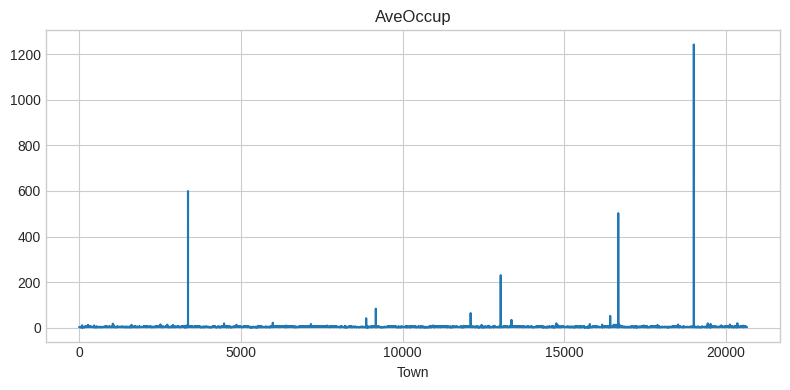

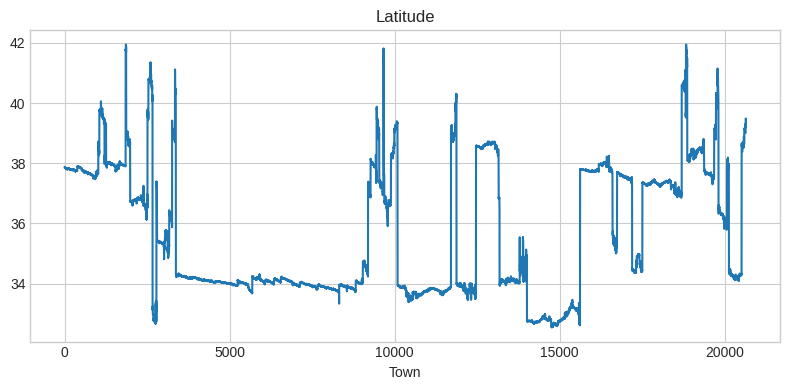

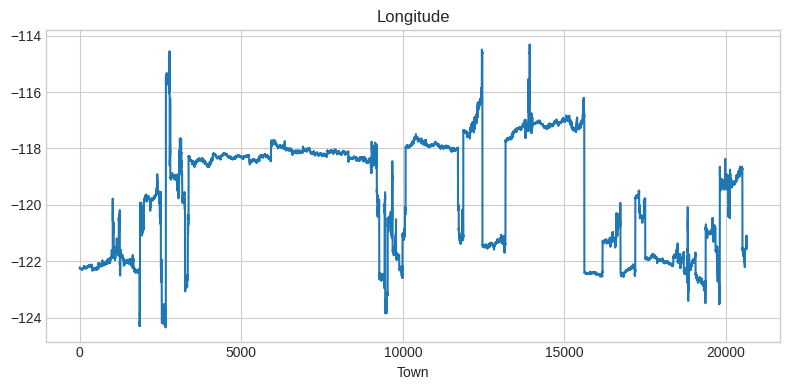

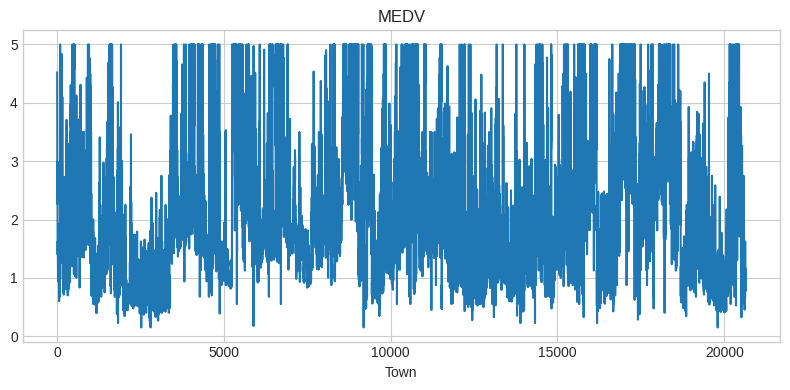

In [72]:
for i, col in enumerate(housing_df.columns):
  plt.figure(figsize=(8,4))
  plt.plot(housing_df[col])
  plt.title(col)
  plt.xlabel('Town')
  plt.tight_layout()

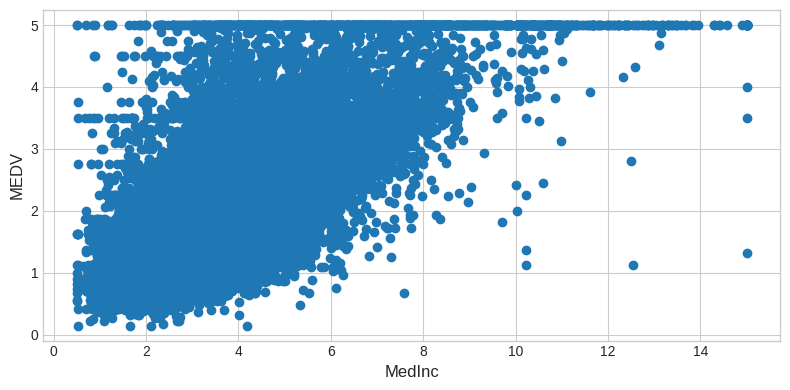

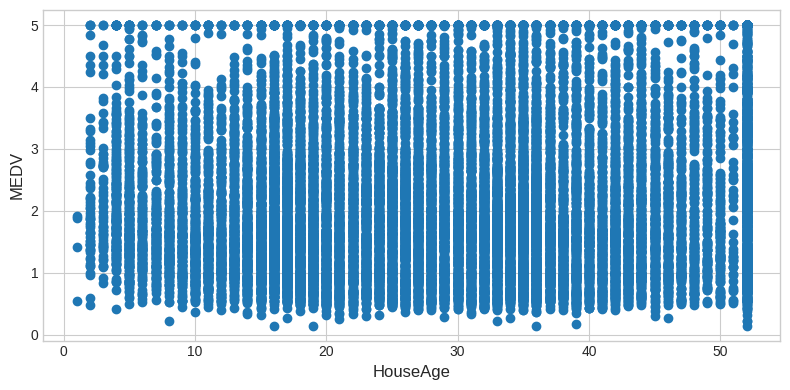

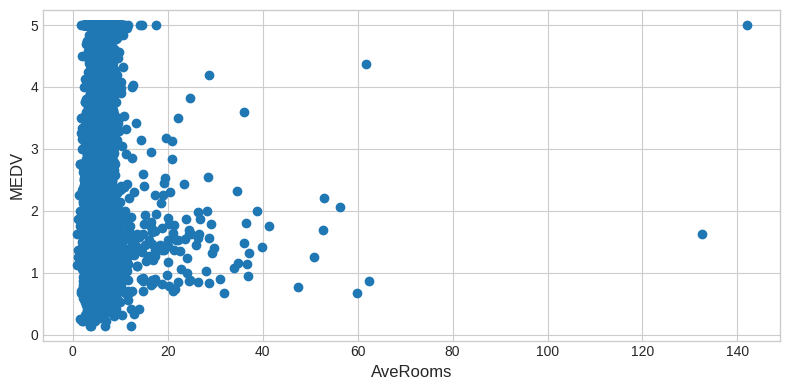

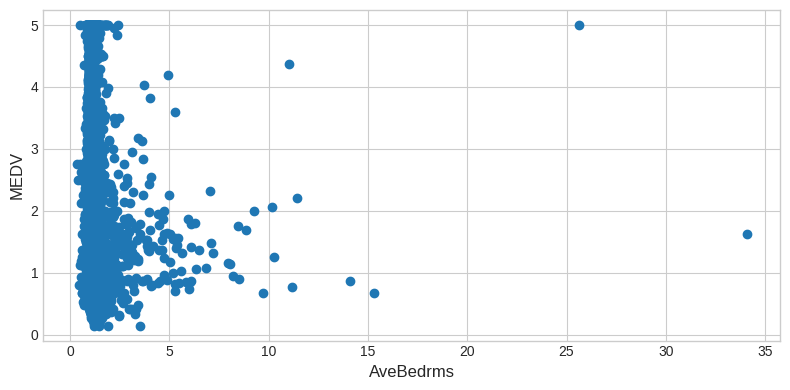

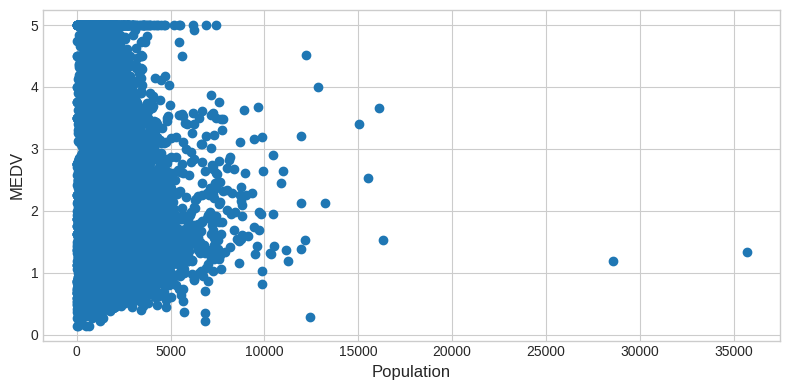

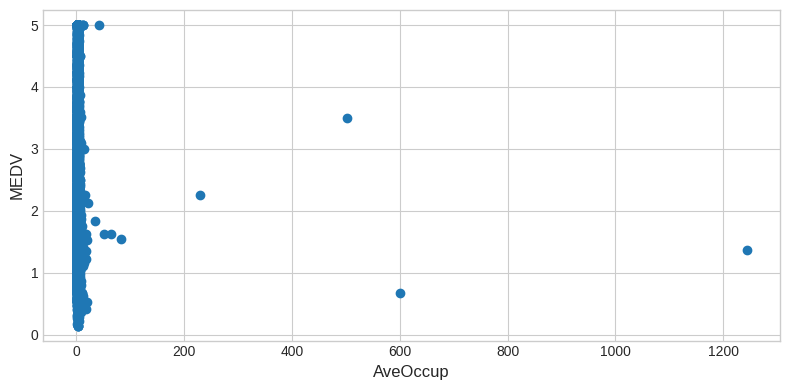

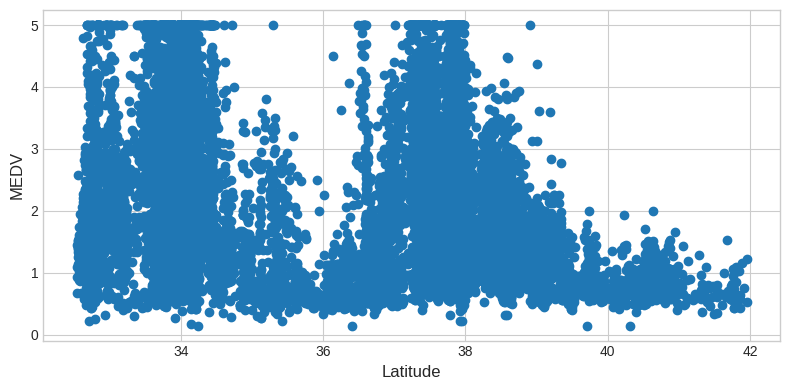

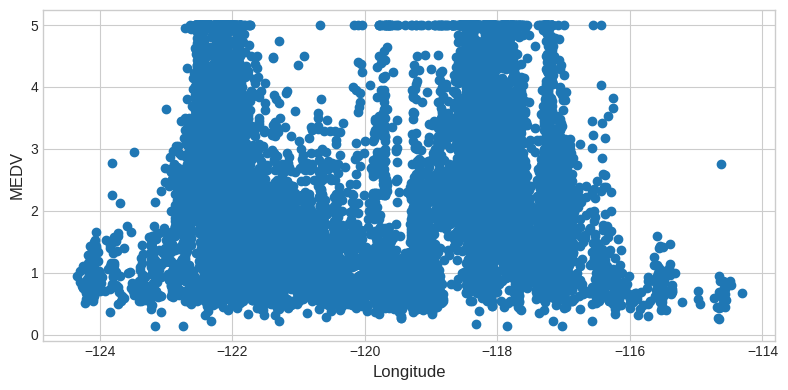

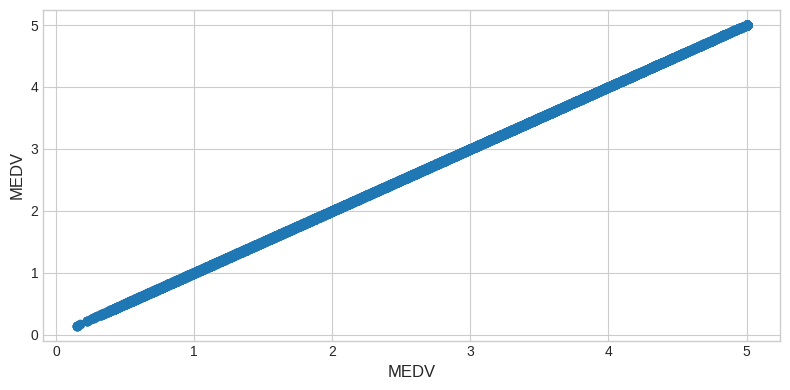

In [73]:
for i, col in enumerate(housing_df.columns):
  plt.figure(figsize=(8,4))
  plt.scatter(housing_df[col], housing_df['MEDV'])
  plt.ylabel('MEDV', size=12)
  plt.xlabel(col, size=12)
  plt.tight_layout()

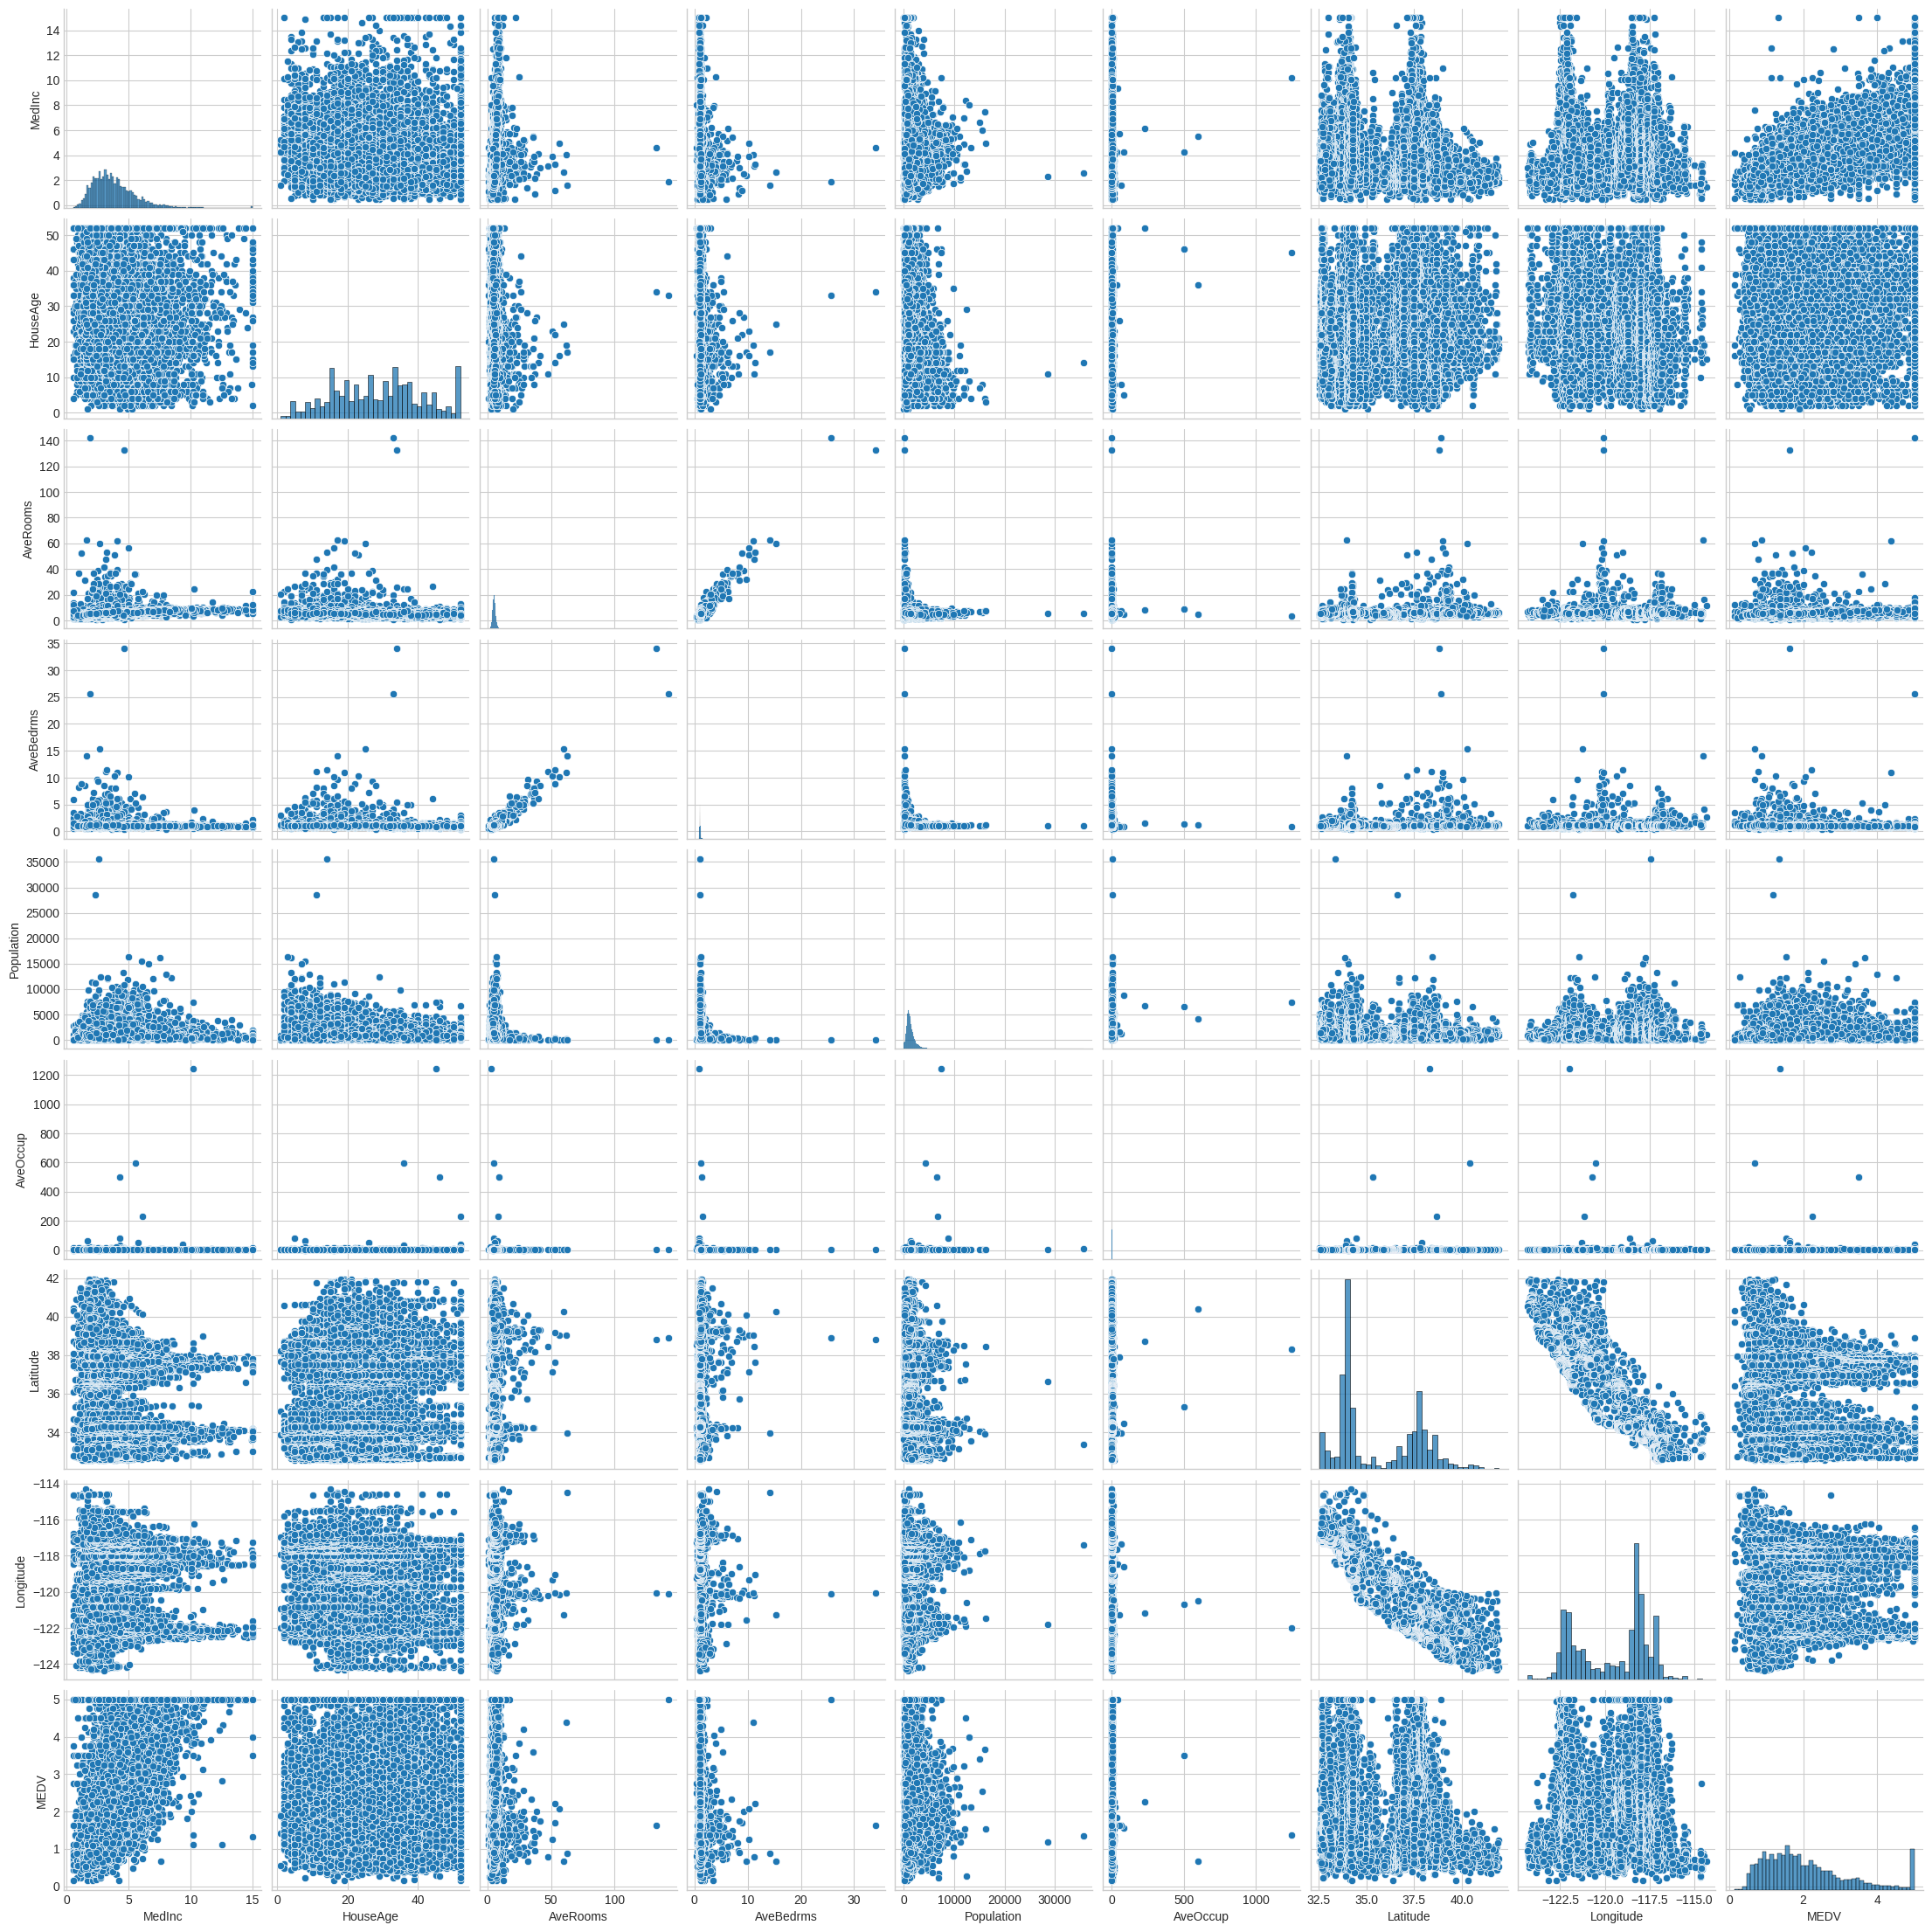

In [74]:
import seaborn as sns

sns.pairplot(housing_df);

In [75]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

model = StandardScaler()
model = LinearRegression()

In [76]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(housing.data, housing.target, test_size=0.2)

model.fit(X_train, y_train)

LinearRegression()

In [77]:

print("학습데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가데이터 점수: {}".format(model.score(X_test, y_test)))

학습데이터 점수: 0.6064825537824912
평가데이터 점수: 0.6046753482819069


In [78]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, housing.data, housing.target, cv=10, scoring='neg_mean_squared_error')
print("NMSE scores: {}".format(scores))
print("NMSE scores mean: {}".format(scores.mean()))
print("NMSE scores std: {}".format(scores.std()))

NMSE scores: [-0.48922052 -0.43335865 -0.8864377  -0.39091641 -0.7479731  -0.52980278
 -0.28798456 -0.77326441 -0.64305557 -0.3275106 ]
NMSE scores mean: -0.550952429695663
NMSE scores std: 0.19288582953865002


In [79]:
r2_scores = cross_val_score(model, housing.data, housing.target, cv=10, scoring='r2')

print("r2 scores: {}".format(r2_scores))
print("r2 scores mean: {}".format(r2_scores.mean()))
print("r2 scores std: {}".format(r2_scores.std()))

r2 scores: [0.48254494 0.61416063 0.42274892 0.48178521 0.55705986 0.5412919
 0.47496038 0.45844938 0.48177943 0.59528796]
r2 scores mean: 0.5110068610523775
r2 scores std: 0.05928861371262438


In [80]:
print('y = ' + str(model.intercept_) + ' ')
for i, c in enumerate(model.coef_):
  print(str(c) + ' * x' + str(i))

y = -36.38629515875586 
0.43832755630967785 * x0
0.009308720216940371 * x1
-0.10577027255041288 * x2
0.6317617639078412 * x3
-4.658462299845373e-06 * x4
-0.004682911941963964 * x5
-0.4176620720175609 * x6
-0.42883418558682324 * x7


In [83]:
from sklearn.metrics import mean_squared_error, r2_score

y_train_predict = model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = r2_score(y_train, y_train_predict)

print('RMSE: {}'.format(rmse))
print('R2 Score: {}'.format(r2))

RMSE: 0.7243458940545454
R2 Score: 0.6064825537824912


In [84]:
y_test_predict = model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2 = r2_score(y_test, y_test_predict)

print('RMSE: {}'.format(rmse))
print('R2 Score: {}'.format(r2))

RMSE: 0.7236092808686769
R2 Score: 0.6046753482819069


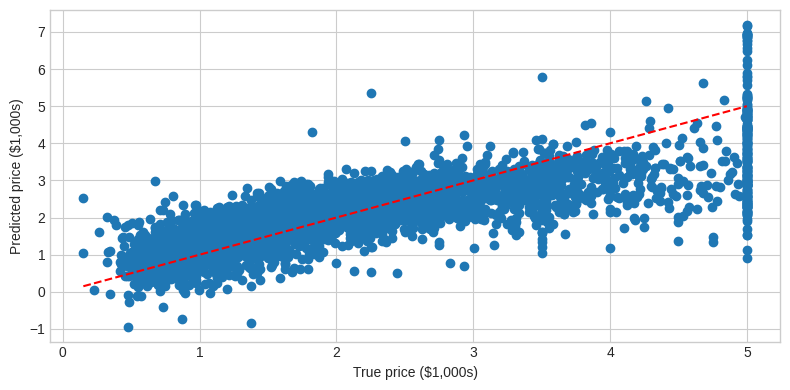

In [86]:
def plot_housing_prices(expected, predicted):
  plt.figure(figsize=(8,4))
  plt.scatter(expected, predicted)
  plt.plot([0.149990, 5.000010], [0.149990, 5.000010], '--r')
  plt.xlabel('True price ($1,000s)')
  plt.ylabel('Predicted price ($1,000s)')
  plt.tight_layout()


predicted = model.predict(X_test)
expected = y_test

plot_housing_prices(expected, predicted)